# Student Performance Indicator
Life cycle of Machince Learing Projects:
1.Understanding the Problem Statement
2.Data Collection
3.Data checks to perform
4.Exploratory Data Analysics
5.Data Preprocessing
6.Model Training
7.Choose the Best Model

1) Problem Statement:
    This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

2) Data Collection:
    Data Source:https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
    The Data constics of 8 columns and 1000 rows

# Importing Data and Packages:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [2]:
data=pd.read_csv(r"E:\End to End ML projects\student performance with Github actions\notebook\Data/stud.csv")

In [3]:
data.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
data.shape

(1000, 8)

Dataset Information
1.gender : sex of students -> (Male/female)
2.race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
3.parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
4.lunch : having lunch before test (standard or free/reduced)
5.test preparation course : complete or not complete before test
6.math score
7.reading score
8.writing score

Data checks to perform:
1.Check Missing values
2.Check Duplicates
3.Check data type
4.Check the number of unique values of each column
5.Check statistics of data set
6.Check various categories present in the different categorical column

In [5]:
data.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
data.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [9]:
data.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [10]:
# Exploring the data:
data.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
print("Categories in 'Gender' variable:  ",end=" ")
print(data["gender"].unique())

print("Categories in 'race_ethnicity' variable:  ",end="  ")
print(data["race_ethnicity"].unique())

print("Categories in 'parental_level_of_education' variable: ",end="  ")
print(data["parental_level_of_education"].unique())

print("Categories in 'lunch' variable:  ",end="  ")
print(data["lunch"].unique())

print("Categories in 'test_preparation_course' variable:  ",end="  ")
print(data["test_preparation_course"].unique())


Categories in 'Gender' variable:   ['female' 'male']
Categories in 'race_ethnicity' variable:    ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable:   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:    ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable:    ['none' 'completed']


In [12]:
# Define numerical & Categorical columns:
numerical_features=[feature for feature in data.columns if data[feature].dtype!="O"]
categorical_features=[feature for feature in data.columns if data[feature].dtype=="O"]

print("we have {} numerical features : {}".format(len(numerical_features),numerical_features))
print("we have {} categorical features:{}".format(len(categorical_features),categorical_features))

we have 3 numerical features : ['math_score', 'reading_score', 'writing_score']
we have 5 categorical features:['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [13]:
data.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [14]:
data["Total_score"]=data["math_score"]+data["reading_score"]+data["writing_score"]
data["Average"]=data["Total_score"]/3
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [15]:
reading_full=data[data["reading_score"]==100]['Average'].count()
writing_full=data[data["writing_score"]==100]["Average"].count()
maths_full=data[data["math_score"]==100]["Average"].count()

In [16]:
print(f"Number of students getting full marks in reading:{reading_full}")
print(f"Number of students getting full marks in writing:{writing_full}")
print(f"Number of students getting full marks in Maths:{maths_full}")

Number of students getting full marks in reading:17
Number of students getting full marks in writing:14
Number of students getting full marks in Maths:7


In [17]:
reading_score_20=data[data['reading_score']<=20]["Average"].count()
writing_score_20=data[data["writing_score"]<=20]["Average"].count()
maths_score_20=data[data["math_score"]<=20]["Average"].count()

In [18]:
print(f"Number of students getting less than 20 in reading:{reading_score_20}")
print(f"Number of students getting less than 20 in writing:{writing_score_20}")
print(f"Number of students getting less than 20 in maths:{maths_score_20}")

Number of students getting less than 20 in reading:1
Number of students getting less than 20 in writing:3
Number of students getting less than 20 in maths:4


# Exploring Data Visualization:
1)Histogram
2)KDE-- (Kernel Distrubution Function)

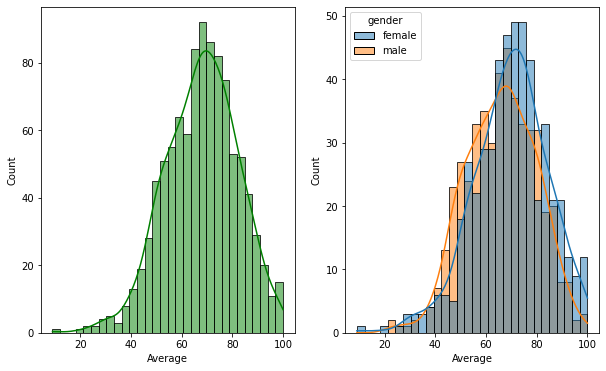

In [19]:
fig,axes=plt.subplots(1,2,figsize=(10,6))
plt.subplot(121)
sns.histplot(data=data,x="Average",bins=30,color="g",kde=True)
plt.subplot(122)
sns.histplot(data=data,x="Average",bins=30,hue="gender",kde=True)
plt.show()

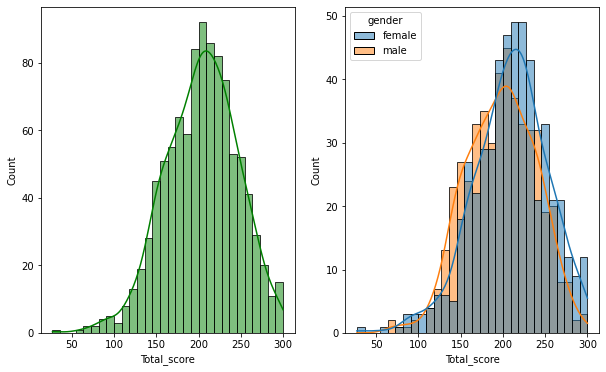

In [20]:
fig,axes=plt.subplots(1,2,figsize=(10,6))
plt.subplot(121)
sns.histplot(data=data,x="Total_score",bins=30,color="g",kde=True)
plt.subplot(122)
sns.histplot(data=data,x="Total_score",bins=30,kde=True,hue="gender")
plt.show()

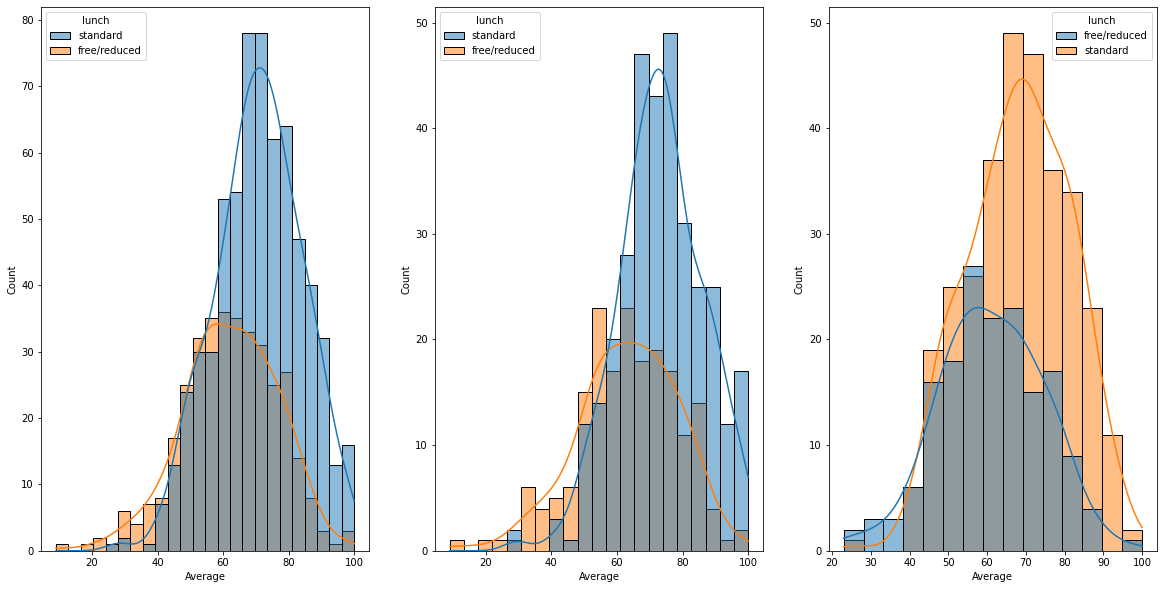

In [21]:
fig,axes=plt.subplots(1,3,figsize=(20,10))
plt.subplot(131)
sns.histplot(data=data,x="Average",kde=True,hue="lunch")
plt.subplot(132)
sns.histplot(data=data[data.gender=="female"],x="Average",kde=True,hue="lunch")
plt.subplot(133)
sns.histplot(data=data[data.gender=="male"],x="Average",kde=True,hue="lunch")
plt.show()

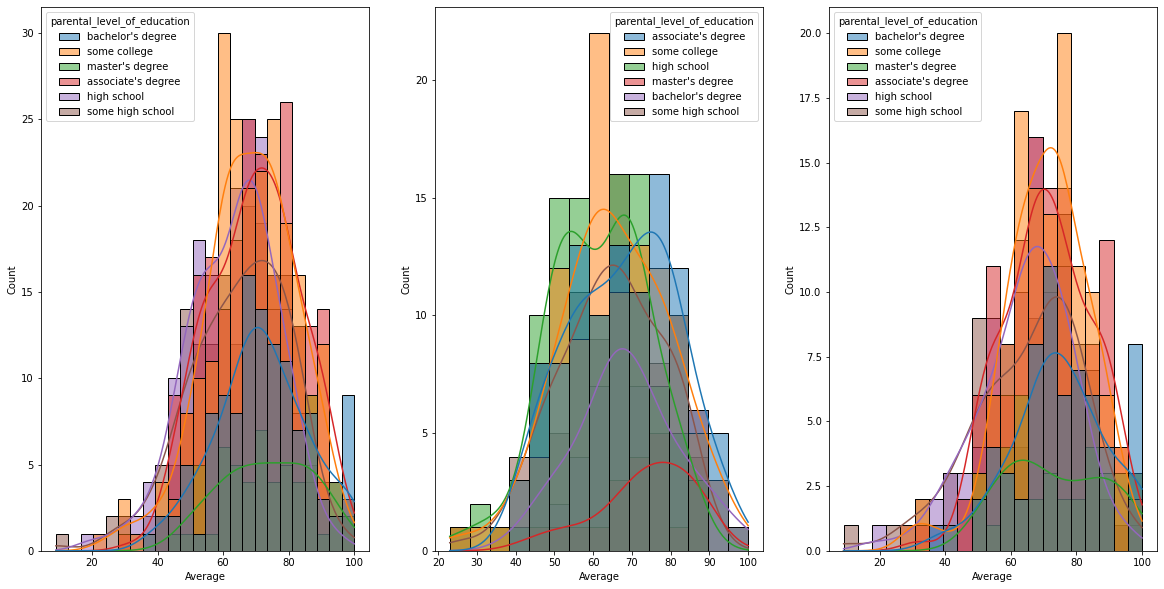

In [22]:
fig,axes=plt.subplots(1,3,figsize=(20,10))
plt.subplot(131)
sns.histplot(data=data,x="Average",kde=True,hue="parental_level_of_education")
plt.subplot(132)
sns.histplot(data=data[data.gender=="male"],x="Average",kde=True,hue="parental_level_of_education")
plt.subplot(133)
sns.histplot(data=data[data.gender=="female"],x="Average",kde=True,hue="parental_level_of_education")
plt.show()

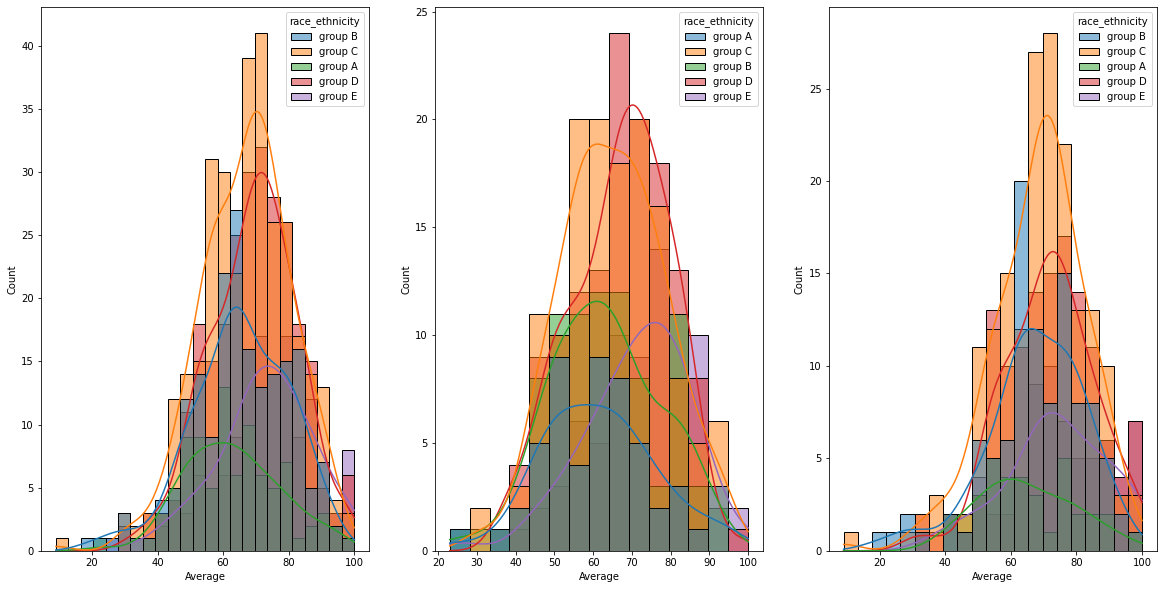

In [23]:
fig,axes=plt.subplots(1,3,figsize=(20,10))
plt.subplot(131)
sns.histplot(data=data,x="Average",kde=True,hue="race_ethnicity")
plt.subplot(132)
sns.histplot(data=data[data.gender=="male"],x="Average",kde=True,hue="race_ethnicity")
plt.subplot(133)
sns.histplot(data=data[data.gender=="female"],x="Average",kde=True,hue="race_ethnicity")
plt.show()

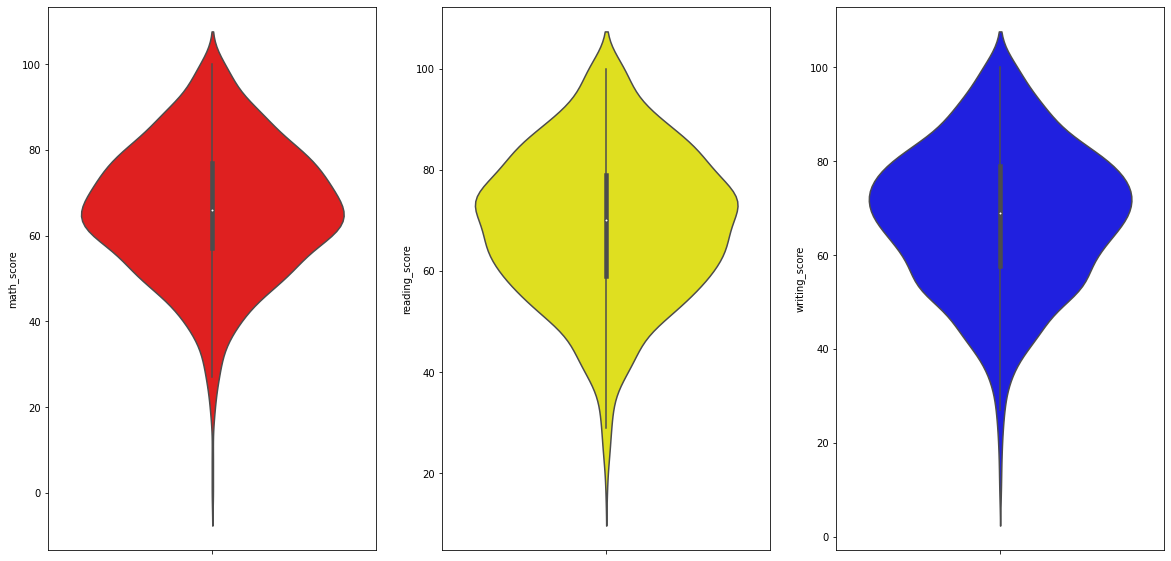

In [27]:
# Maximum score in all three subjects:
fig,axes=plt.subplots(1,3,figsize=(20,10))
plt.subplot(131)
sns.violinplot(y="math_score",data=data,color="red")
plt.subplot(132)
sns.violinplot(y="reading_score",data=data,color="yellow")
plt.subplot(133)
sns.violinplot(y="writing_score",data=data,color="blue")
plt.show()

(-1.25, 1.25, -1.25, 1.25)

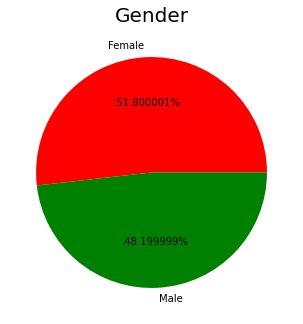

In [29]:
# Multivariant Analysics:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = data['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')


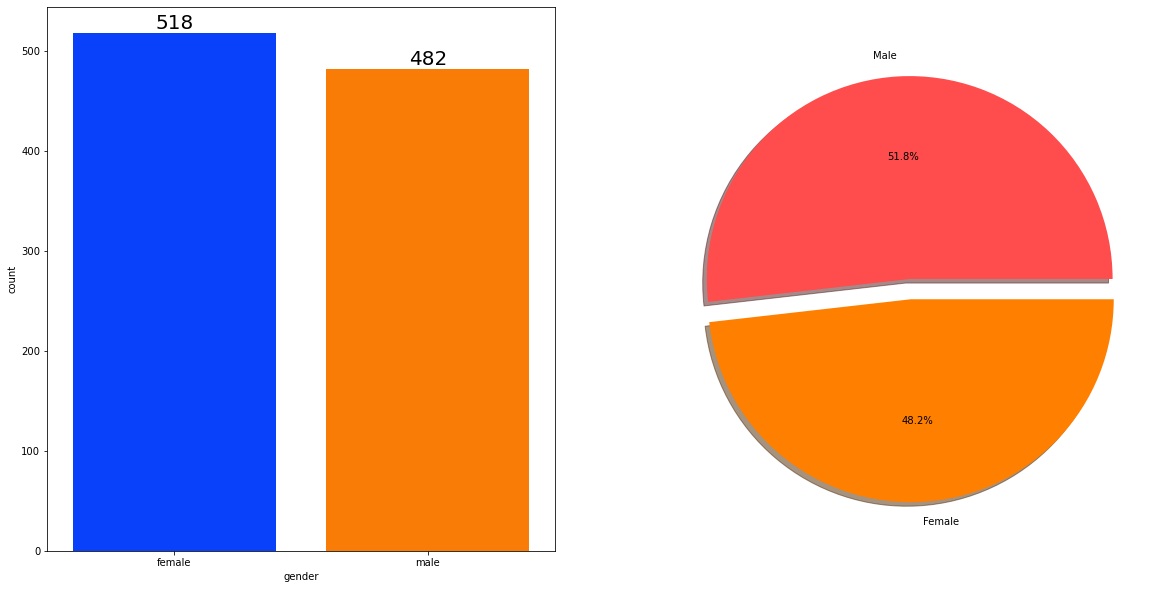

In [30]:
# Feature wise Analysics:
#1) Univariant Analysics:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=data['gender'],data=data,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=data['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()    

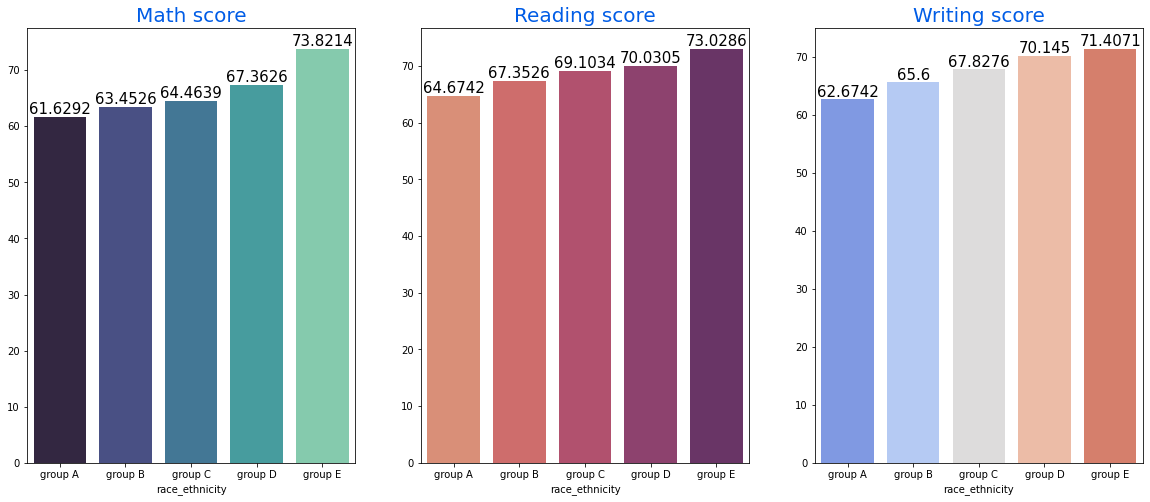

In [33]:
# BIVariant Analysics:
Group_data2=data.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

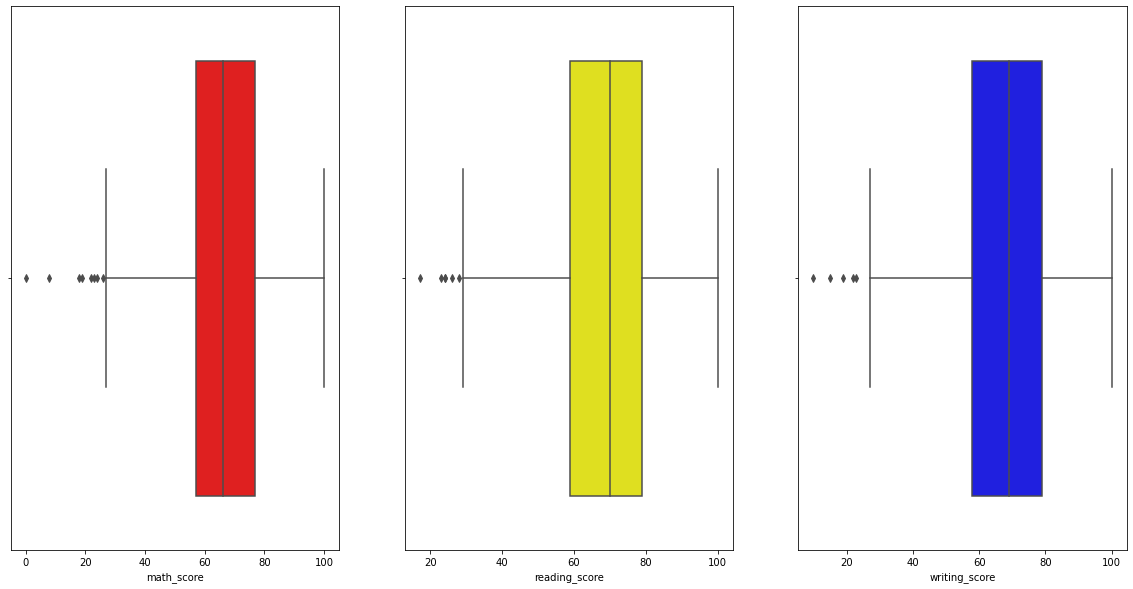

In [35]:
# Checking Outliers:
fig,axes=plt.subplots(1,3,figsize=(20,10))
plt.subplot(131)
sns.boxplot(data=data,x=data["math_score"],color="red")
plt.subplot(132)
sns.boxplot(data=data,x=data["reading_score"],color="yellow")
plt.subplot(133)
sns.boxplot(data=data,x=data["writing_score"],color="blue")
plt.show()

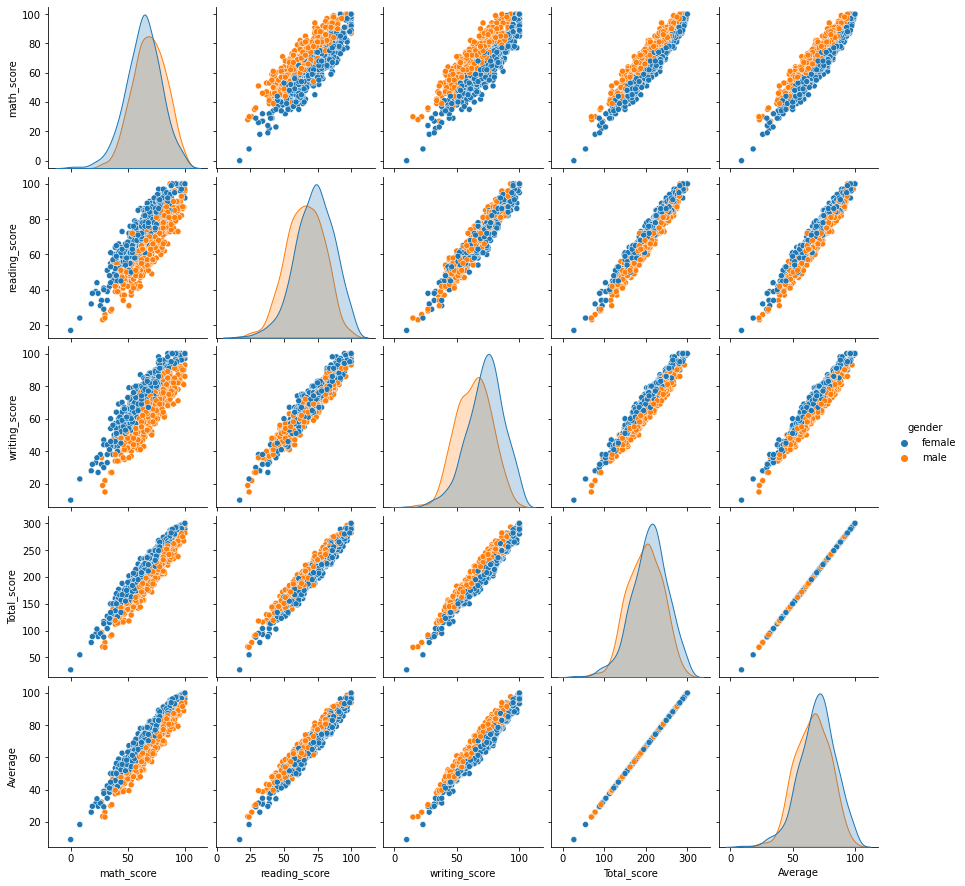

In [37]:
# Multivariant plot:
sns.pairplot(data,hue = 'gender')
plt.show()